In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.integrate import quad

## 1

### a

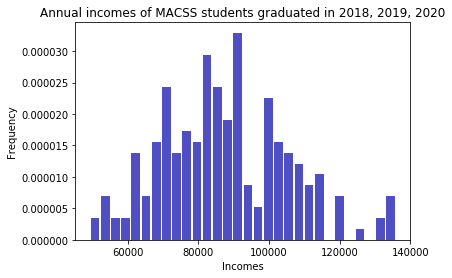

In [2]:
Incomes = np.loadtxt('data/incomes.txt')
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()

### b

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


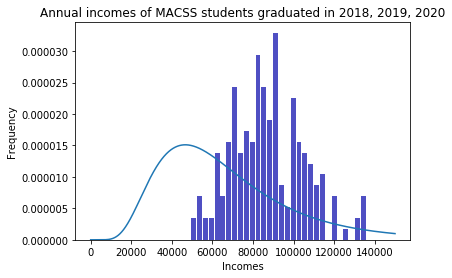

The value of the log likelihood value is -2385.856997808558


In [3]:
def lognorm(x, mu=11, sigma=0.5):
    return 1/(x*sigma * np.sqrt(2 * np.pi))*np.e**(-(np.log(x) - mu)**2 / (2 * sigma**2))
def log_lik_truncnorm(x, mu=11, sigma=0.5):
    pdf_vals = lognorm(x, mu, sigma)
    polishedpdf = pdf_vals
    ln_pdf_vals = np.log(polishedpdf)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
total = 1
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.plot(X, lognorm(X)/total)
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()
LLV = log_lik_truncnorm(Incomes)
print('The value of the log likelihood value is', LLV)

### c

In [4]:
def crit(params):
    mu, sigma = params
    log_lik_val = log_lik_truncnorm(Incomes, mu, sigma)
    neg_log_lik_val = -log_lik_val    
    return neg_log_lik_val

In [5]:
import scipy.optimize as opt
mu_init = 11
sig_init = 0.5 
params_init = np.array([mu_init, sig_init])

bnds = ((None, None), (1e-10, None))
results = opt.minimize(crit, params_init, tol=1e-14, method='L-BFGS-B', bounds = bnds)
mu_MLE, sig_MLE = results.x
LLV_MLE = log_lik_truncnorm(Incomes, mu_MLE, sig_MLE)
VCV_MLE = results.hess_inv

print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print('The value of the log likelihood value is', LLV_MLE)
print('The variance-covariance matrix is', VCV_MLE)

mu_MLE= 11.495016102470231  sig_MLE= 0.3108792150154579
The value of the log likelihood value is -2285.8999545081624
The variance-covariance matrix is <2x2 LbfgsInvHessProduct with dtype=float64>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


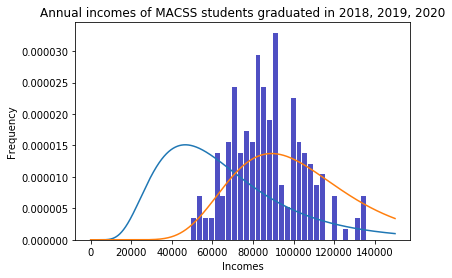

In [6]:
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.plot(X, lognorm(X), label = 'initial guess')
ax.plot(X, lognorm(X, mu=mu_MLE,sigma=sig_MLE), label = 'MLE result')
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()

### d

In [7]:
mu_new, sig_new = np.array([11, 0.5])
log_lik_h0 = log_lik_truncnorm(Incomes, mu_new, sig_new)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_truncnorm(Incomes, mu_MLE, sig_MLE)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2385.856997808558
MLE log likelihood -2285.8999545081624
likelihood ratio value 199.91408660079105
chi squared of H0 with 2 degrees of freedom p-value =  0.0


### e

In [8]:
print("The probability that you will earn more than $100,000 is",
      quad(lambda x: lognorm(x, mu=mu_MLE,sigma=sig_MLE), 100000, np.inf)[0])
print("The probability that you will earn less than $75,000 is",
      quad(lambda x: lognorm(x, mu=mu_MLE,sigma=sig_MLE), 0, 75000)[0])

The probability that you will earn more than $100,000 is 0.47703014049157744
The probability that you will earn less than $75,000 is 0.19275920035472388


## 2

### a

beta0_MLE = 0.25164168313073476 beta1_MLE = 0.01293361306625627 beta2_MLE = 0.4004998342959863 beta3_MLE = -0.009991727572206786 sigma_MLE = -0.0030176140174798765
The value of the log likelihood value is 876.8650774281919
The variance-covariance matrix is <5x5 LbfgsInvHessProduct with dtype=float64>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


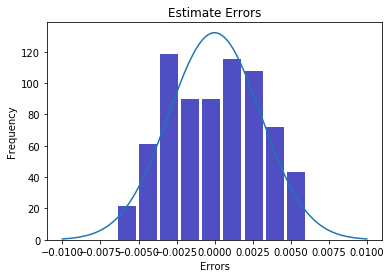

In [9]:
def norm_pdf(x, sigma):
    sigma = np.abs(sigma)
    pdf_vals = (1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - x**2 / (2 * sigma**2)))     
    return pdf_vals
def log_lik_norm(x, beta0, beta1, beta2, beta3, sigma):
    error = x[:,0] - beta0 - beta1*x[:,1] - beta2*x[:,2] - beta3*x[:,3]
    pdf_vals = norm_pdf(error, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
def new_crit(params, *args):
    beta0, beta1, beta2, beta3, sigma = params
    x = args[0]
    log_lik_val = log_lik_norm(x,beta0, beta1, beta2, beta3, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val
Data = []
with open('data/sick.txt') as f:
    for line in f:
        line = line.strip()
        data = line.split(',')
        Data.append(data)
Data.pop(0)
for i in range(len(Data)):
    Data[i] = [float(x) for x in Data[i]]
Data = np.array(Data)
new_Data = np.ones_like(Data)
new_Data[:,1:] = Data[:,1:]
beta0_init, beta1_init, beta2_init, beta3_init = np.linalg.lstsq(new_Data,Data[:,0])[0]
sigma_init = 0.01 
parameters_init = np.array([beta0_init, beta1_init, beta2_init, beta3_init, sigma_init])
results2 = opt.minimize(new_crit, parameters_init, args=(Data),tol=1e-14, method='L-BFGS-B')
beta0_MLE, beta1_MLE, beta2_MLE, beta3_MLE, sigma_MLE = results2.x
new_LLV_MLE = log_lik_norm(Data, beta0_MLE, beta1_MLE, beta2_MLE, beta3_MLE, sigma_MLE)
new_VCV_MLE = results2.hess_inv
print('beta0_MLE =',beta0_MLE,
      'beta1_MLE =',beta1_MLE,
      'beta2_MLE =',beta2_MLE, 
      'beta3_MLE =',beta3_MLE,
      'sigma_MLE =',sigma_MLE)
print('The value of the log likelihood value is', new_LLV_MLE)
print('The variance-covariance matrix is', new_VCV_MLE)
Error = Data[:,0] - beta0_MLE - beta1_MLE*Data[:,1] - beta2_MLE*Data[:,2] - beta3_MLE*Data[:,3]
X2 = np.linspace(-0.01,0.01,10001)
fig,ax = plt.subplots()
ax.set_xlabel('Errors')
ax.set_ylabel('Frequency')
ax.set_title('Estimate Errors')
ax.plot(X2, norm_pdf(X2,sigma_MLE))
ax.hist(x=Error, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()

### b

In [10]:
parameters_new = np.array([1,0,0,0,0.1])
log_lik_h0 = log_lik_norm(Data, *parameters_new)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_norm(Data, *results2.x)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.8650774281919
likelihood ratio value 6261.131530940634
chi squared of H0 with 5 degrees of freedom p-value =  0.0


The results show that it's not likely that age, number of children, and average winter temperature have no effect on the number of sick days.